In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [2]:
# MLP structure

L = 2

dim = np.zeros((L+1,))

dim[0] = 5
dim[1] = 6
dim[2] = 7
#dim[3] = 20
#dim[4] = 30
#dim[5] = 8
#dim[6] = 9
#dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [3]:
# draw random parameters, generate matrix and make it positive definite 

phi = np.random.normal(0,1,(L-2,))
ttphi = np.random.normal(0,1,(L-1,))
tPhi1 = np.random.normal(0,1,(dim[0],1))
tPhiL = np.random.normal(0,1,(dim[L],1))
PHI1 = np.random.normal(0,1,(dim[0],dim[0]))
PHI1 = PHI1 + PHI1.T
PHIL = np.random.normal(0,1,(dim[L],dim[L]))
PHIL = PHIL + PHIL.T
ttPHIL = np.random.normal(0,1,(dim[L],dim[L]))
ttPHIL = ttPHIL + ttPHIL.T
PSI1 = []
if L==2:
    PSI1 = np.random.normal(0,1,(dim[0],dim[2]))


covg = sm.par2cov(L,dim,phi,ttphi,tPhi1,tPhiL,PHI1,PSI1,PHIL,ttPHIL)


covg2 = covg @ covg
evl, evc = np.linalg.eigh(covg2)
sqrtcovg2 = (evc * np.sqrt(evl)) @ evc.T



In [4]:
# test the grad2par function with exact estimation

npar = 0
for iL in np.arange(0,L):
    npar = npar + (dim[iL]+1) * dim[iL+1]
npar = npar.astype(int)
    
grad = np.sqrt(npar) * sqrtcovg2

phiest,ttphiest,tPhi1est,tPhiLest,PHI1est,PSI1est,PHILest,ttPHILest = sm.cov2par(L,dim,covg2)

phiest2,ttphiest2,tPhi1est2,tPhiLest2,PHI1est2,PSI1est2,PHILest2,ttPHILest2,tMuLest2 = sm.grad2par(L,dim,grad)

covg2est = sm.par2cov(L,dim,phiest2,ttphiest2,tPhi1est2,tPhiLest2,PHI1est2,PSI1est2,PHILest2,ttPHILest2)


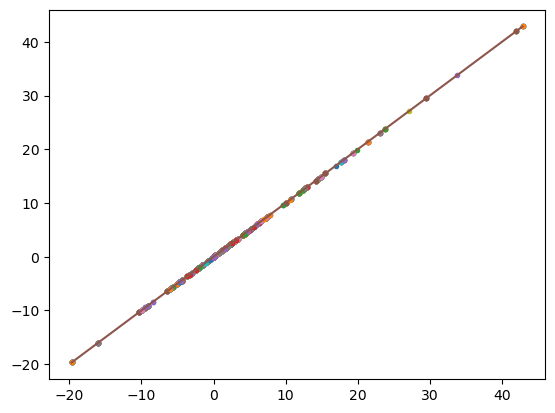

[]


[]


[11.83753404]


[11.83753404]


[[-10.3817943 ]
 [  0.01930149]
 [  0.23114656]
 [  4.31995706]
 [ -0.83387367]]


[-10.3817943    0.01930149   0.23114656   4.31995706  -0.83387367]


[[-1.58409017]
 [ 4.12433546]
 [ 0.92377955]
 [ 2.3967797 ]
 [-4.41360589]
 [ 0.34358141]
 [-2.18416523]]


[-1.58409017  4.12433546  0.92377955  2.3967797  -4.41360589  0.34358141
 -2.18416523]


[[ 29.46571781 -19.69040308  14.42655842  -3.4579965    1.70542645]
 [-19.69040308  42.87208476 -16.02597323  -2.1307954    1.15640738]
 [ 14.42655842 -16.02597323  23.08050498   2.04476582  -0.1170091 ]
 [ -3.4579965   -2.1307954    2.04476582   7.42930692  -2.01074047]
 [  1.70542645   1.15640738  -0.1170091   -2.01074047  17.64187777]]


[[ 29.46571781 -19.69040308  14.42655842  -3.4579965    1.70542645]
 [-19.69040308  42.87208476 -16.02597323  -2.1307954    1.15640738]
 [ 14.42655842 -16.02597323  23.08050498   2.04476582  -0.1170091 ]
 [ -3.4579965   -2.1307954    2.04476582   7.42930692  -2.0107

In [5]:

plt.plot(covg2,covg2est,linestyle='none',marker='.')
plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
plt.show()


print(phiest)
print('\n')
print(phiest2)
print('\n')
print(ttphiest)
print('\n')
print(ttphiest2)
print('\n')
print(tPhi1est)
print('\n')
print(tPhi1est2)
print('\n')
print(tPhiLest)
print('\n')
print(tPhiLest2)
print('\n')
print(PHI1est)
print('\n')
print(PHI1est2)
print('\n')
print(PSI1est)
print('\n')
print(PSI1est2)
print('\n')
print(PHILest)
print('\n')
print(PHILest2)
print('\n')
print(ttPHILest)
print('\n')
print(ttPHILest2)






In [6]:
# test the grad2par function with approximate estimation (a small set of R vectors)

R = 10

npar = 0
for iL in np.arange(0,L):
    npar = npar + (dim[iL]+1) * dim[iL+1]
npar = npar.astype(int)
    
grad = np.random.normal(0.,1.,(npar,R))

grad = sqrtcovg2 @ grad

phiest,ttphiest,tPhi1est,tPhiLest,PHI1est,PSI1est,PHILest,ttPHILest = sm.cov2par(L,dim,covg2)

phiest2,ttphiest2,tPhi1est2,tPhiLest2,PHI1est2,PSI1est2,PHILest2,ttPHILest2,tMuLest2 = sm.grad2par(L,dim,grad)

covg2est = sm.par2cov(L,dim,phiest2,ttphiest2,tPhi1est2,tPhiLest2,PHI1est2,PSI1est2,PHILest2,ttPHILest2)


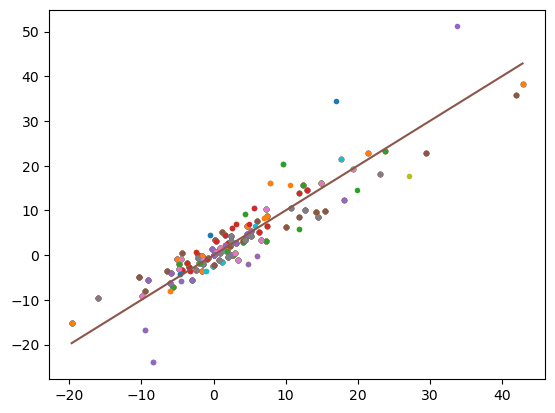

[]


[]


[11.83753404]


[8.55510836]


[[-10.3817943 ]
 [  0.01930149]
 [  0.23114656]
 [  4.31995706]
 [ -0.83387367]]


[-4.91861796 -2.24220635  3.37528233  3.81844317 -0.63472886]


[[-1.58409017]
 [ 4.12433546]
 [ 0.92377955]
 [ 2.3967797 ]
 [-4.41360589]
 [ 0.34358141]
 [-2.18416523]]


[-0.30168001  2.96834888  1.45244901  0.0161304   0.58179125  0.64431535
 -0.69336764]


[[ 29.46571781 -19.69040308  14.42655842  -3.4579965    1.70542645]
 [-19.69040308  42.87208476 -16.02597323  -2.1307954    1.15640738]
 [ 14.42655842 -16.02597323  23.08050498   2.04476582  -0.1170091 ]
 [ -3.4579965   -2.1307954    2.04476582   7.42930692  -2.01074047]
 [  1.70542645   1.15640738  -0.1170091   -2.01074047  17.64187777]]


[[ 22.88478704 -15.27738319   8.62633664  -2.73078949   0.98384167]
 [-15.27738319  38.17061573  -9.61868011  -0.0819464   -1.43536106]
 [  8.62633664  -9.61868011  18.11741922   2.65231108  -2.31964536]
 [ -2.73078949  -0.0819464    2.65231108   6.59828518  -1.7900988 ]


In [7]:

plt.plot(covg2,covg2est,linestyle='none',marker='.')
plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
plt.show()


print(phiest)
print('\n')
print(phiest2)
print('\n')
print(ttphiest)
print('\n')
print(ttphiest2)
print('\n')
print(tPhi1est)
print('\n')
print(tPhi1est2)
print('\n')
print(tPhiLest)
print('\n')
print(tPhiLest2)
print('\n')
print(PHI1est)
print('\n')
print(PHI1est2)
print('\n')
print(PSI1est)
print('\n')
print(PSI1est2)
print('\n')
print(PHILest)
print('\n')
print(PHILest2)
print('\n')
print(ttPHILest)
print('\n')
print(ttPHILest2)

